**Applied Statistics**<br/>
Prod. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

Name: foo      <br/>
Vorname: foo   <br/>

# Assignment 2: Multiple Linear regression 

This question involves the use of multiple linear regression on the **Auto** data set. In particular, only use **observations 1 to 200** for your analysis. 

- (a) Produce a scatterplot matrix which includes all of the variables in the data set.
- (b) Compute the matrix of correlations between the variables using the function cor(). 
- (c) Use the statsmodel ols function to perform a multiple linear regression with **mpg** as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
   1. Is there a relationship between the predictors and the response?
   2. Which predictors appear to have a statistically significant relationship to the response?
   3. What does the coefficient for the year variable suggest?
- (d) Use some diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
- (e) Use the * and : symbols to fit linear regression models (ols) with interaction effects. Do any interactions appear to be statistically significant? Try different transformations of the X variable 'horsepower', such as log(X), sqrt(x) and $X^2$ and compare the fit with the simple model without transformation. Use the 

   - adjusted R-squared, 
   - mean squared error of residuals (MSE), 
   - the F-Statistic, 
   - the Bayesian Information Criterion (BIC) and
   - Akaike's Information criterion (AIC) to comment on your findings. 
   
  Hint: given a predictor X, we can create a predictor $X^2$ using $I(X**2)$. The function I() is needed since somy symbols have a special meaning in a formula. Furthermore, you can use np.sqrt(X) and np.log(X).

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
sns.set() 
%matplotlib inline 
plt.style.use('ggplot') 

In [2]:
# Load the csv data files into pandas dataframes
PATH = './Data/' 
df = pd.read_csv(PATH + 'Auto.csv',nrows=200)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [6]:
# change data type
df['origin'] = pd.Categorical(df['origin'])
df['name'] = pd.Categorical(df['name'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # solution

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(198, 9)

**a)**

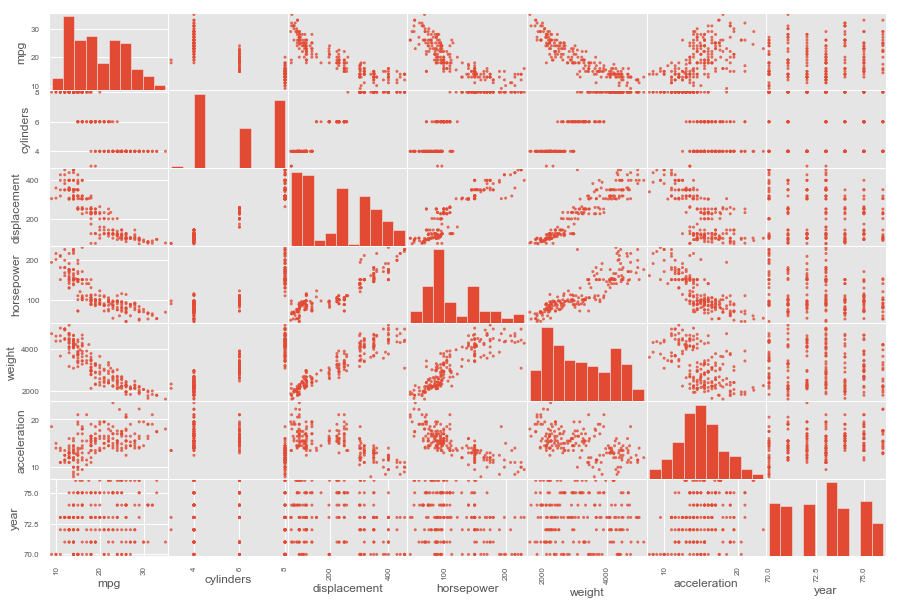

In [10]:
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(15, 10), diagonal='hist');

**b)**

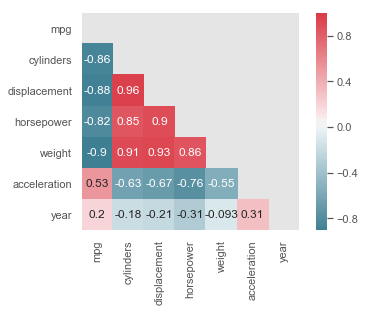

In [11]:
# Inspect relationship between variables with correlation
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

**c)**

In [12]:
ols_lm = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df).fit()
#ols_lm = smf.ols(formula='mpg ~ weight + year + origin', data=df).fit()
ols_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sat, 24 Nov 2018   Prob (F-statistic):           4.96e-74
Time:                        10:22:58   Log-Likelihood:                -442.33
No. Observations:                 198   AIC:                             902.7
Df Residuals:                     189   BIC:                             932.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.8255      7.677      1.801      0.073      -1.319      28.970
origin[T.2]      1.9798      0.631      3.137      0.002       0.735       3.225
origin[T.3]      2.6552      0.692      3.836      0.000       1.290       4.021
cylinders       -0.1625      0.332     -0.489      0.625      -0.817       0.493
displacement    -0.0004      0.007     -0.051      0.959      -0.014       0.013
horsepower      -0.0159      0.012     -1.338      0.182      -0.039       0.008
weight          -0.0040      0.001     -6.788      0.000      -0.005      -0.003
acceleration    -0.0655      0.101     -0.649      0.517      -0.265       0.134
year             0.2990      0.100      2.999      0.003       0.102       0.496
==============================================================================
Omnibus:                       13.338   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.107
Skew:                          -0.425   Prob(JB):                     7.10e-05
Kurtosis:                       4.262   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Is there a relationship between the predictors and the response?**  
Für diese Betrachtung benutzen wir die folgenden Parameter:  
    - Adjusted R-Squared: 0.845  
    - F-Statistics: 135.5  
    - (Prob)F-Statistics: 4.96e-74  
    
Mit dem Adjusted R-Squared können wir die Aussage treffen, dass 84.5% der Daten durch unser Modell erklärbar sind.  
Anhand des Ergebnisses der F-Statistik können wir die Null-Hypothese widerlegen, da der Wert weit größer als 1 ist und der zugehörige P-Wert nahe 0.  
  
**Which predictors appear to have a statistically significant relationship to the response?**  
Für diese Betrachtung nutzen wir den P-Wert:
    - weight: 0.000
    - origin[T.3]: 0.000
    - origin[T.2]: 0.002
    - year: 0.003  
Nur die hier aufgeführten Variablen haben einen P-Wert unter 0.05. Die restlichen Variabeln können verworfen werden, da sie statistisch nicht signifikant für das Ergebnis sind.


**What does the coefficient for the year variable suggest?**  
$\hat{\beta}year$ = 0.2990  
Dieser Koeffizient beschreibt die Steigung der 'miles per galon' über die Jahre. Demnach steigt der Verbrauch mit steigender Jahreszahl an.

**d)**

Text(0, 0.5, 'Residuals')

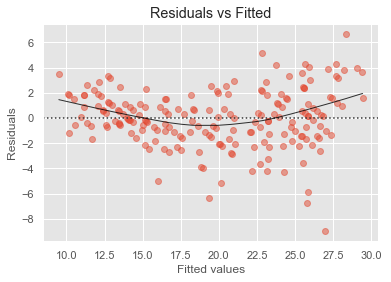

In [13]:
# fitted values
model_fitted_y = ols_lm.fittedvalues
# Basic plot
plot = sns.residplot(model_fitted_y, 'mpg', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'black', 
                               'lw': 1, 'alpha': 0.8})

plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

Die Gegenüberstellung der Residuals (Rest = Observed - Predicted) mit den Fitted Values sieht gut aus, da die Punkte sich positiv und negativ in horizontaler Richtung um die 0 bewegen. Dadurch verteilen sich die Fehler im positiven sowie im negativen Bereich (line_kws).  
Es fallen zwei Ausreißer auf, einer bei ca. (27.6,6.5) sowie ein weiterer bei ca. (27.4,-9).

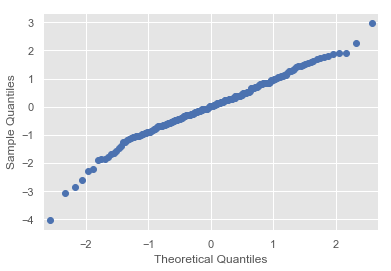

In [14]:
# Use standardized residuals
sm.qqplot(ols_lm.get_influence().resid_studentized_internal);

Im Bereich X>2 befinden sich Ausreißer, welche nicht auf der Diagonalen liegen, sowie im Bereich X<1.2. Da sich die restlichen Punkte auf der Diagonalen befinden, können wir trotzdem davon ausgehen, dass die Daten normalverteilt sind und wir mit den bekannten statistischen Werkzeugen weiterarbeiten könnnen.

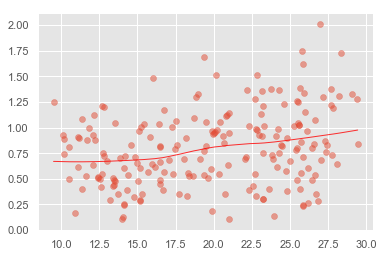

In [15]:
# Scale Location plot
plt.scatter(ols_lm.fittedvalues, np.sqrt(np.abs(ols_lm.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(ols_lm.fittedvalues, np.sqrt(np.abs(ols_lm.get_influence().resid_studentized_internal)), 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

Im Plot sehen wir eine eher horizontale Linie, um welche die Punkte eher gleichmäßig verteilt sind. Die ist positiv für uns, da es bedeutet, dass Homoskedastiziät vorliegt, welche wir benötigen, um statistische Verfahren, wie den t-Test oder den F-Test, anwenden zu können.

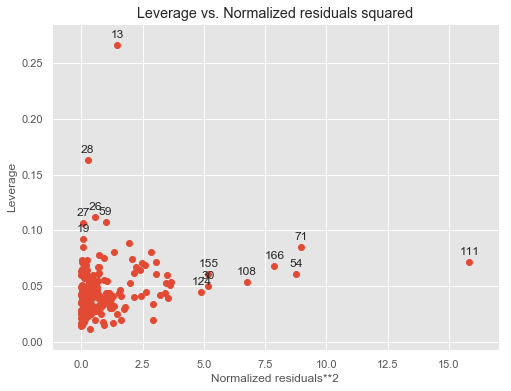

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols_lm, ax = ax)

Der Punkt 13 ist ein Ausreißer, der die Qualität des Modells relativ stark beeinflussen könnte, da er ein hohes Leverage hat. Allerdings liegt kein hoher Residualwert vor, weshalb dieser Punkt vernachlässigt werden kann. Der Punkt 111 hat zwar einen hohen Residualwert, jedoch ein geringes Leverage, weshalb dieser Punkt auch vernachlässigt werden kann.

**e)**

In [17]:
interaction1 = smf.ols(formula='mpg ~ cylinders + displacement + horsepower:weight + acceleration + year + origin',data=df).fit()
interaction2 = smf.ols(formula='mpg ~ cylinders + displacement + horsepower*weight + acceleration + year + origin',data=df).fit()
interaction3 = smf.ols(formula='mpg ~ cylinders + displacement + np.log(horsepower) + weight + acceleration + year + origin',data=df).fit()
interaction4 = smf.ols(formula='mpg ~ cylinders + displacement + np.power(horsepower,2) + weight + acceleration + year + origin',data=df).fit()
interaction5 = smf.ols(formula='mpg ~ cylinders + displacement + np.sqrt(horsepower) + weight + acceleration + year + origin',data=df).fit()

In [18]:
models = [ols_lm,
          interaction1,
          interaction2,
          interaction3,
          interaction4,
          interaction5]

In [88]:
print("adj_r\tmse\tf_stat\tf_pval\tbic\taic")
for entry in models:
    print("{:6.2f}\t{:6.2f}\t{:6.2f}\t{:6.2f}\t{:6.2f}\t{:6.2f}".format(entry.rsquared_adj, entry.mse_resid, entry.fvalue, entry.f_pvalue, entry.bic, entry.aic))

adj_r	mse	f_stat	f_pval	bic	aic
  0.85	  5.35	135.47	  0.00	932.26	902.67
  0.81	  6.72	117.45	  0.00	973.38	947.08
  0.88	  4.22	158.48	  0.00	889.43	856.55
  0.86	  5.00	146.44	  0.00	919.06	889.46
  0.84	  5.40	134.03	  0.00	934.06	904.47
  0.85	  5.21	139.52	  0.00	927.28	897.69


Alle gebauten Modelle sind statistisch signifikant, da die Werte der F-Statistik alle über 1 liegen und der dazugehörige P-Wert nahe 0 ist. Dadurch kann die Null-Hypothese bei allen Modellen widerlegt werden. Zwei der gebauten Modelle übertreffen das ursprüngliche Modell. Bei diesen wurde mit $horsepower*weight$ sowie mit $np.log(horsepower)$ gearbeitet. Diese beiden Modelle haben auch den besten adjusted R-squared, bei dem einen können 88% der Daten von dem Modell erklärt werden und bei dem anderen 86%.  
Beim Vergleich der Modelle mithilfe des BICs und des AICs ist das Resultat, dass ```interaction2``` das beste Modell darstellt. Der Mean Squared Error ist bei diesem Modell ebenfalls am niedrigsten.

**alternative result presentation with dataframe**

In [39]:
df_interaction=pd.DataFrame(columns=['adj_r','mse','f_stat','f_pvalue','bic','aic'])
for entry in models:
    d1 = {'adj_r':[entry.rsquared_adj],'mse':[entry.mse_resid],'f_stat':[entry.fvalue],'f_pvalue':[entry.f_pvalue],'bic':[entry.bic],'aic':[entry.aic]}
    df_temp = pd.DataFrame.from_dict(d1)
    df_interaction = df_interaction.append(df_temp,ignore_index=True)

df_interaction

,adj_r,mse,f_stat,f_pvalue,bic,aic
0,0.845219,5.347707,135.470509,4.957802e-74,932.263356,902.668953
1,0.805368,6.724558,117.452302,1.592510e-65,973.381403,947.075267
2,0.877966,4.216304,158.477520,8.136972e-83,889.434837,856.552167
3,0.855204,5.002700,146.442399,9.390089e-77,919.058713,889.464309
4,0.843806,5.396528,134.031238,1.164683e-73,934.062731,904.468328
5,0.849064,5.214838,139.524107,4.658780e-75,927.281707,897.687303
